In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


response_counts No     7826
Yes    1308
Name: Response, dtype: int64


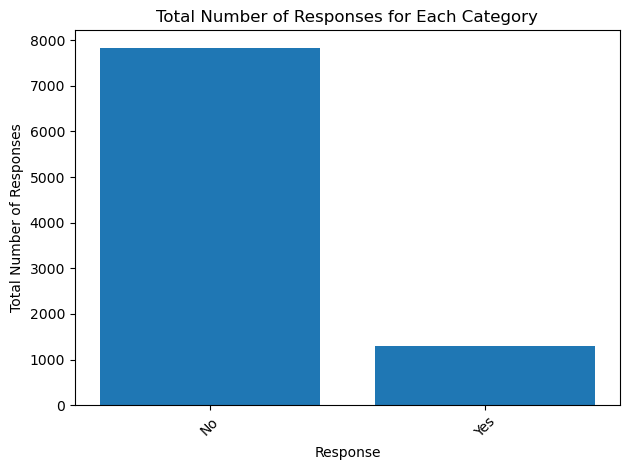

response_counts agent No     80.845557
Yes    19.154443
Name: Response, dtype: float64 No     89.121813
Yes    10.878187
Name: Response, dtype: float64 No     88.226415
Yes    11.773585
Name: Response, dtype: float64 No     88.546942
Yes    11.453058
Name: Response, dtype: float64


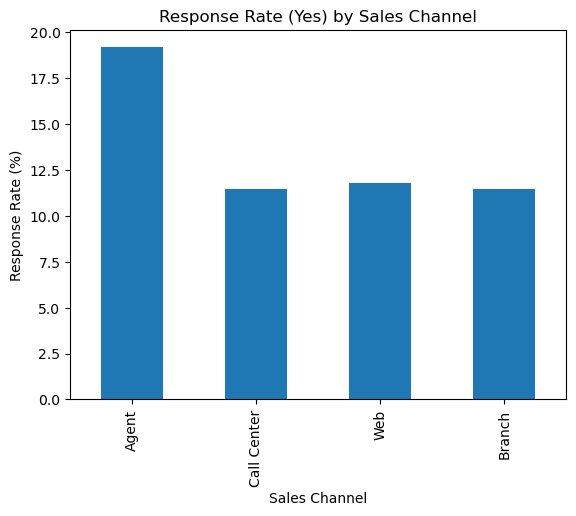

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,high Total Claim Account
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,True
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,True
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,True
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,True
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,False


In [49]:
data = pd.read_csv('marketing_customer_analysis.csv')
display(data.head())
data.describe().T
data.describe(include=[object]).T

response_counts = data['Response'].value_counts()
print("response_counts", response_counts)

unique_responses = response_counts.index.tolist()
counts = response_counts.tolist()

plt.bar(unique_responses, counts)

plt.xlabel("Response")
plt.ylabel("Total Number of Responses")
plt.title("Total Number of Responses for Each Category")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

data["Sales Channel"].unique()

filtered_agent = data[data['Sales Channel'] == 'Agent']
filtered_call_center = data[data['Sales Channel'] == 'Call Center']
filtered_call_web = data[data['Sales Channel'] == 'Web']
filtered_call_branch = data[data['Sales Channel'] == 'Branch']

response_counts_agent = filtered_agent['Response'].value_counts(normalize=True) * 100
response_call_center = filtered_call_center['Response'].value_counts(normalize=True) * 100
response_call_web = filtered_call_web['Response'].value_counts(normalize=True) * 100
response_branch = filtered_call_branch['Response'].value_counts(normalize=True) * 100

print("response_counts agent", response_counts_agent, response_call_center, response_call_web, response_branch)

response_rates = {
    'Agent': {'No': 80.845557, 'Yes': 19.154443},
    'Call Center': {'No': 88.546942, 'Yes': 11.453058},
    'Web': {'No': 88.226415, 'Yes': 11.773585},
    'Branch': {'No': 88.546942, 'Yes': 11.453058}
}

# Convert the response rates to a DataFrame for easier plotting
response_rates_df = pd.DataFrame(response_rates)

# Plot only the 'Yes' response rates using a bar plot
response_rates_df.loc['Yes'].plot(kind='bar')

# Set plot labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate (%)')
plt.title('Response Rate (Yes) by Sales Channel')

# Show the plot
plt.show()






No     84.030743
Yes    15.969257
Name: Response, dtype: float64

No     91.176471
Yes     8.823529
Name: Response, dtype: float64

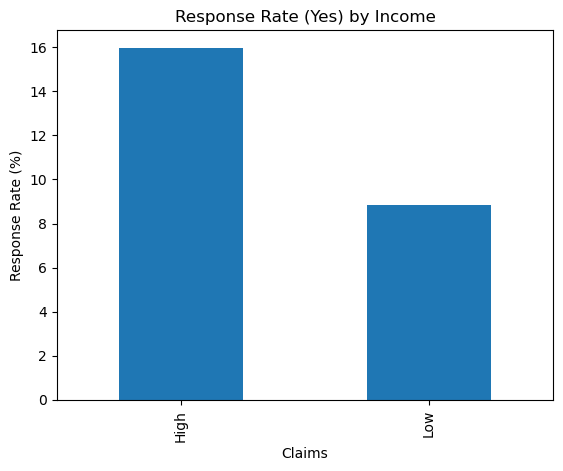

In [55]:
data["high Total Claim Account"] = data["Total Claim Amount"] > 250
data.head()

filtered_high_tca = data[data['high Total Claim Account'] == True ]
filtered_low_tcs = data[data['high Total Claim Account'] == False ]

response_high_tca = filtered_high_tca['Response'].value_counts(normalize=True) * 100
response_call_center = filtered_low_tcs['Response'].value_counts(normalize=True) * 100

display(response_high_tca, response_call_center)

response_rates_total_claim = {
    'High': {'No': 84.030743, 'Yes': 15.969257},
    'Low': {'No': 91.176471, 'Yes': 8.823529}
}

# Convert the response rates to a DataFrame for easier plotting
response_rates_df = pd.DataFrame(response_rates_total_claim)

# Plot only the 'Yes' response rates using a bar plot
response_rates_df.loc['Yes'].plot(kind='bar')

plt.xlabel('Claims')
plt.ylabel('Response Rate (%)')
plt.title('Response Rate (Yes) by TCA')

# Show the plot
plt.show()

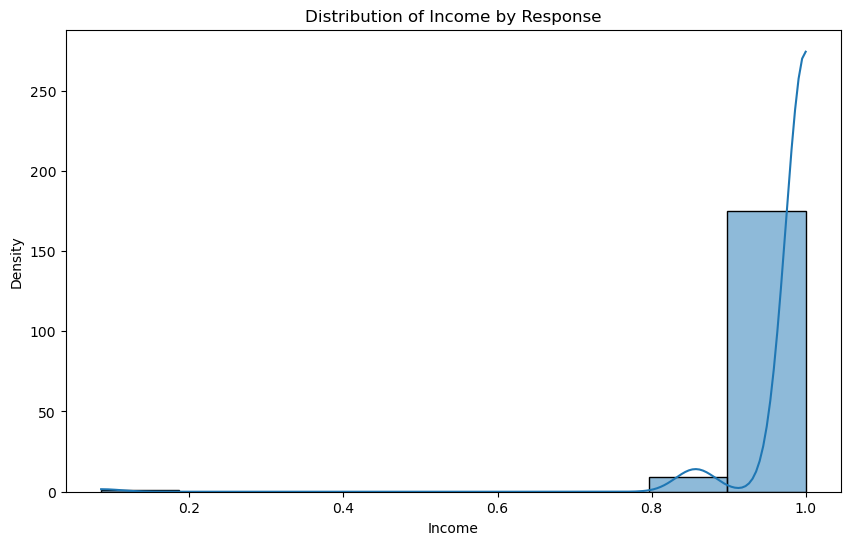

In [66]:
response_rates_TCA = data[data['Response'] == 'Yes']['Income'].value_counts() / data['Income'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(response_rates_TCA, kde=True, label='Yes')
plt.title('Distribution of Income by Response')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()